# PARTE I
El Dataset a utilizar para elaborar esta actividad, es **🍿 IMDb Top 100 Movies Dataset (2025 Edition)**, este dataset fue obtenido el día 12 de octubre de 2025, de la página de Kaggle, elaborado por *Shayan Zulfiqar*. El dataset se puede obtener del siguiente link: https://www.kaggle.com/datasets/shayanzk/imdb-top-100-movies-dataset-2025-edition

Este conjunto de datos contiene información detallada sobre las 100 películas mejor valoradas en IMDb (hasta 2025). Está diseñado para proyectos de exploración, visualización y aprendizaje automático de datos relacionados con el cine, las preferencias de la audiencia y las tendencias narrativas.

📊 Características incluidas:
* 🎥 Title — Nombre de la película
* 📅 Year — Año de estreno
* ⭐ IMDb Rating — Calificación promedio (sobre 10)
* 🗳️ Votes — Número de votos de los usuarios de IMDb
* 🎭 Genre — Géneros primarios y secundarios
* 🎬 Director — Director de cine
* 🌟 Stars / Cast — Actores o actrices principales
* 🕒 Runtime— Duración en minutos

El objetivo de usar este Dataset, es poder pronosticar la recaudación que puede tener una pelicula, dependiendo de algunos factores.

In [1]:
# @title Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Usar la siguiente librería, solo SI, el programa se ejecuta en Google-Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Guardado de dataset en variable
df = pd.read_csv('/content/drive/MyDrive/CUATRIMESTRES/1/ESTADISTICA APLICADA/SEMANA 4/top_100_movies_full_best_effort.csv') #Ruta del dataset
df.head() # Muestra las primeras 5 filas del dataset

,Rank,Title,Year,Genre(s),Director,Main Actor(s),Country,IMDb Rating,Rotten Tomatoes %,Runtime (mins),Language,Oscars Won,Box Office ($M),Metacritic Score
0,1,The Shawshank Redemption,1994,Drama,Frank Darabont,Tim Robbins|Morgan Freeman,United States,9.3,91.0,142.0,English,0,58.0,82.0
1,2,The Godfather,1972,Crime|Drama,Francis Ford Coppola,Marlon Brando|Al Pacino,United States,9.2,98.0,175.0,English,3,246.1,100.0
2,3,The Dark Knight,2008,Action|Crime|Drama,Christopher Nolan,Christian Bale|Heath Ledger,United States|United Kingdom,9.0,94.0,152.0,English,2,1004.9,84.0
3,4,The Godfather: Part II,1974,Crime|Drama,Francis Ford Coppola,Al Pacino|Robert De Niro,United States,9.0,97.0,202.0,English,6,48.5,90.0
4,5,12 Angry Men,1957,Crime|Drama,Sidney Lumet,Henry Fonda|Lee J. Cobb,United States,9.0,100.0,96.0,English,0,1.0,96.0


# PARTE II

In [3]:
# @title Analizar información

display(df.info())
"""Analizando la informacion, tenemos 14 columnas, de las cuales:
- 8 columnas son numericas
- 6 columnas son categoricas
"""

# Analizar cuantos grupos existen en cada variable/columna categorica
df[['Title', 'Genre(s)', 'Director', 'Main Actor(s)', 'Country', 'Language']].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               100 non-null    int64  
 1   Title              100 non-null    object 
 2   Year               100 non-null    int64  
 3   Genre(s)           100 non-null    object 
 4   Director           100 non-null    object 
 5   Main Actor(s)      100 non-null    object 
 6   Country            100 non-null    object 
 7   IMDb Rating        99 non-null     float64
 8   Rotten Tomatoes %  97 non-null     float64
 9   Runtime (mins)     99 non-null     float64
 10  Language           100 non-null    object 
 11  Oscars Won         100 non-null    int64  
 12  Box Office ($M)    83 non-null     float64
 13  Metacritic Score   50 non-null     float64
dtypes: float64(5), int64(3), object(6)
memory usage: 11.1+ KB


None

,0
Title,99
Genre(s),62
Director,57
Main Actor(s),92
Country,21
Language,13


In [4]:
# @title  Imputar Valores Nulos en Variables Numericas
from sklearn.impute import SimpleImputer

# Imputación por Media
columnas_media = ['IMDb Rating', 'Rotten Tomatoes %', 'Runtime (mins)']
imputer_media = SimpleImputer(strategy='mean')
df[columnas_media] = imputer_media.fit_transform(df[columnas_media])

# KNN Imputation (K-Nearest Neighbors)
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df['Box Office ($M)'] = imputer_knn.fit_transform(df[['Box Office ($M)']])

# MICE (Multiple Imputation by Chained Equations)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer_mice = IterativeImputer()
df['Metacritic Score'] = imputer_mice.fit_transform(df[['Metacritic Score']])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               100 non-null    int64  
 1   Title              100 non-null    object 
 2   Year               100 non-null    int64  
 3   Genre(s)           100 non-null    object 
 4   Director           100 non-null    object 
 5   Main Actor(s)      100 non-null    object 
 6   Country            100 non-null    object 
 7   IMDb Rating        100 non-null    float64
 8   Rotten Tomatoes %  100 non-null    float64
 9   Runtime (mins)     100 non-null    float64
 10  Language           100 non-null    object 
 11  Oscars Won         100 non-null    int64  
 12  Box Office ($M)    100 non-null    float64
 13  Metacritic Score   100 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 11.1+ KB


In [5]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


In [6]:
# @title Codificar Datos Categoricos
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

x = df.drop('Box Office ($M)', axis=1)
y = df['Box Office ($M)']

"""
['Country', 'Language'] ---> Ordinal Encoding
['Title', 'Genre(s)', 'Director', 'Main Actor(s)'] ---> Binary Encoding
"""

# Columnas a codificar
ordinal_cols = ['Country', 'Language']
binary_cols = ['Title', 'Genre(s)', 'Director', 'Main Actor(s)']

# Crear transformers
ordinal_transformer = OrdinalEncoder()
binary_transformer = BinaryEncoder()

# Crear una ColumnTransformer para aplicar diferentes transformaciones a las columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_cols),
        ('bin', binary_transformer, binary_cols)],
    remainder='passthrough' # Keep other columns
)

# Create a pipeline that first preprocesses the data
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

original_cols = x.columns

# Entrenar y transformar los datos
x = pipeline.fit_transform(x)

In [7]:
# @title Dividir el dataset en conjunto de entrenamiento y conjunto de testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 46)

In [8]:
# @title Escalado de variables

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
# @title Aplicar el modelo de Regresión Lineal Múltiple con el conjunto de entrenamiento

from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo_train = modelo.fit(X_train, y_train)

In [10]:
# Intercepto y coeficientes de la ecuación de regresión lineal múltiple muestral
print(modelo_train.intercept_)
print(modelo_train.coef_)

194.90260542168645
[ 2.82907444e+01  4.38393742e+00  3.91663163e+02  2.02207219e+02
  4.37340421e+01  5.11115253e+01 -4.11425605e+01  1.00869815e+01
  1.55256996e-01 -1.84344894e+01  3.20372027e+01 -3.19535602e+01
  9.25043554e+00 -2.33954219e+01  4.63683094e+00 -4.21507789e+01
  1.26617152e+01  3.31543132e+01  2.51879385e+01 -3.16344709e+01
  3.95809865e+01 -1.75289798e+02 -1.43344743e+02 -2.25583263e+01
  1.17123595e+01  2.62685807e+01  3.57258084e+00 -2.31450364e+01
 -2.57541350e+02  6.34885194e+01 -1.05160454e+01 -2.25156056e+01
 -1.70023693e+01  9.95236906e+01  7.09093177e+00]


In [11]:
# @title Predicción de los resultados en el conjunto de testing

y_pred = modelo.predict(X_test)

In [12]:
# @title Construir el modelo óptimo de RLM utilizando la eliminación hacia atrás

import statsmodels.api as sm

# Add a column of ones for the intercept
X_opt = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), values = X_train, axis = 1)

# Backward Elimination
SL = 0.05
num_cols = X_opt.shape[1]
for i in range(0, num_cols):
    regression_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
    max_p_value = max(regression_OLS.pvalues)
    if max_p_value > SL:
        for j in range(0, X_opt.shape[1]): # Iterate through the current columns
            if regression_OLS.pvalues.iloc[j] == max_p_value:
                X_opt = np.delete(X_opt, j, 1)
                break # Break inner loop after removing a column
    else:
        break # Break outer loop if all p-values are below SL

print(regression_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:        Box Office ($M)   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     9.501
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           4.97e-07
Time:                        15:48:24   Log-Likelihood:                -534.68
No. Observations:                  80   AIC:                             1081.
Df Residuals:                      74   BIC:                             1096.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        194.9026     22.477      8.671      0.0

# PARTE III

In [13]:
"""import pandas as pd
import numpy as np
import statsmodels.api as sm

# Suponiendo que ya tienes X_train y y_train preparados
# Añadir columna de unos para el intercepto
X_train_const = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal múltiple
modelo = sm.OLS(y_train, X_train_const).fit()

# Resumen completo del modelo
print(modelo.summary())"""
# No tiene sentido ponerlo, porque el modelo OLS, ya esta arriba

'import pandas as pd\nimport numpy as np\nimport statsmodels.api as sm\n\n# Suponiendo que ya tienes X_train y y_train preparados\n# Añadir columna de unos para el intercepto\nX_train_const = sm.add_constant(X_train)\n\n# Ajustar el modelo de regresión lineal múltiple\nmodelo = sm.OLS(y_train, X_train_const).fit()\n\n# Resumen completo del modelo\nprint(modelo.summary())'

In [14]:
# Acceder a valores específicos:
r_cuadrada = regression_OLS.rsquared
varianza = regression_OLS.mse_resid  # estimación de la varianza del error
f_stat = regression_OLS.fvalue
p_f_stat = regression_OLS.f_pvalue
log_likelihood = regression_OLS.llf


In [15]:
print(f"R-cuadrada: {r_cuadrada}")
print(f"Estimación de la varianza: {varianza}")
print(f"F-statistic: {f_stat}")
print(f"P(F-statistic): {p_f_stat}")
print(f"Log-Likelihood: {log_likelihood}")

R-cuadrada: 0.3909609237152504
Estimación de la varianza: 40418.32811763842
F-statistic: 9.500575408531617
P(F-statistic): 4.974716456239501e-07
Log-Likelihood: -534.6781660916648


# PARTE IV

In [16]:
"""import statsmodels.api as sm

# Suponiendo que X_train y y_train ya están definidos
X_train_const = sm.add_constant(X_train)  # Añadir columna de 1's para el intercepto

# Ajustar modelo de Regresión Lineal Múltiple
modelo = sm.OLS(y_train, X_train_const).fit()

# Resumen completo
print(modelo.summary())"""
# Lo mismo, el modelo ya esta creado

"import statsmodels.api as sm\n\n# Suponiendo que X_train y y_train ya están definidos\nX_train_const = sm.add_constant(X_train)  # Añadir columna de 1's para el intercepto\n\n# Ajustar modelo de Regresión Lineal Múltiple\nmodelo = sm.OLS(y_train, X_train_const).fit()\n\n# Resumen completo\nprint(modelo.summary())"

In [17]:
# IV.1. Valores de std err
std_err = regression_OLS.bse
print("Errores estándar de los coeficientes:\n", std_err)


Errores estándar de los coeficientes:
 const    22.477302
x1       22.942668
x2       29.158919
x3       27.913360
x4       25.063485
x5       23.391257
dtype: float64


In [18]:
# IV.2. Variables significativas según P>|t| con α=0.05
p_values = regression_OLS.pvalues
variables_significativas = p_values[p_values < 0.05]
print("Variables independientes significativas (α=0.05):\n", variables_significativas)

Variables independientes significativas (α=0.05):
 const    6.960527e-13
x1       1.871057e-02
x2       4.388439e-03
x3       9.093512e-03
x4       3.699477e-02
x5       4.112132e-03
dtype: float64


In [19]:
# IV.3. Dos variables que mejor explican según valor t
t_values = regression_OLS.tvalues.abs()  # Tomar valor absoluto
t_values_sorted = t_values.sort_values(ascending=False)
top2_variables = t_values_sorted.index[1:3]  # Excluyendo el intercept
print("Dos variables que mejor explican la dependiente según t:\n", top2_variables)

Dos variables que mejor explican la dependiente según t:
 Index(['x5', 'x2'], dtype='object')


In [20]:
# IV.4. Intervalo de confianza del 95% para la variable más significativa
conf_int = regression_OLS.conf_int(alpha=0.05)
mejor_variable = top2_variables[0]
intervalo_confianza = conf_int.loc[mejor_variable]
print(f"Intervalo de confianza 95% para {mejor_variable}:\n", intervalo_confianza)

Intervalo de confianza 95% para x5:
 0     22.667070
1    115.883266
Name: x5, dtype: float64


# PARTE 5

In [21]:
"""import statsmodels.api as sm
import numpy as np
import pandas as pd

# Suponiendo que X_train y y_train ya están definidos
# Agregar columna de unos para el intercepto
X_opt = sm.add_constant(X_train)

# Ajustar el modelo
modelo = sm.OLS(y_train, X_opt).fit()

# Mostrar resumen completo del modelo
print(modelo.summary())"""

'import statsmodels.api as sm\nimport numpy as np\nimport pandas as pd\n\n# Suponiendo que X_train y y_train ya están definidos\n# Agregar columna de unos para el intercepto\nX_opt = sm.add_constant(X_train)\n\n# Ajustar el modelo\nmodelo = sm.OLS(y_train, X_opt).fit()\n\n# Mostrar resumen completo del modelo\nprint(modelo.summary())'

In [22]:
import re

# Obtener el resumen como un string
summary_string = regression_OLS.summary().as_text()

# Usa regex para encontrar Omnibus y Prob(Omnibus)
omnibus_match = re.search(r'Omnibus:\s+(\d+\.\d+)', summary_string)
omnibus_pvalue_match = re.search(r'Prob\(Omnibus\):\s+(\d+\.\d+e-\d+|\d+\.\d+)', summary_string)


# Extraer los valores encontrados
omnibus_value = float(omnibus_match.group(1)) if omnibus_match else "Not found"
omnibus_pvalue_value = float(omnibus_pvalue_match.group(1)) if omnibus_pvalue_match else "Not found"

print("Omnibus:", omnibus_value)
print("Prob(Omnibus):", omnibus_pvalue_value)

Omnibus: 14.18
Prob(Omnibus): 0.001


In [23]:
# Durbin-Watson

durbin_watson_match = re.search(r'Durbin-Watson:\s+(\d+\.\d+)', summary_string)
durbin_watson_value = float(durbin_watson_match.group(1)) if durbin_watson_match else "Not found"
print("Durbin-Watson:", durbin_watson_value)


Durbin-Watson: 1.954


In [24]:
# Jarque-Bera y Prob(JB)
jarque_bera_match = re.search(r'Jarque-Bera \(JB\):\s+(\d+\.\d+)', summary_string)
jarque_bera_pvalue_match = re.search(r'Prob\(JB\):\s+(\d+\.\d+e-\d+|\d+\.\d+)', summary_string)

jarque_bera_value = float(jarque_bera_match.group(1)) if jarque_bera_match else "Not found"
jarque_bera_pvalue_value = float(jarque_bera_pvalue_match.group(1)) if jarque_bera_pvalue_match else "Not found"

print("Jarque-Bera:", jarque_bera_value)
print("Prob(JB):", jarque_bera_pvalue_value)

Jarque-Bera: 16.016
Prob(JB): 0.000333


In [26]:
# Skew y Kurtosis de los residuos
skew_match = re.search(r'Skew:\s+(-?\d+\.\d+)', summary_string)
kurtosis_match = re.search(r'Kurtosis:\s+(-?\d+\.\d+)', summary_string)

skew_value = float(skew_match.group(1)) if skew_match else "Not found"
kurtosis_value = float(kurtosis_match.group(1)) if kurtosis_match else "Not found"

print("Skew:", regression_OLS.resid.skew())
print("Kurtosis:", regression_OLS.resid.kurtosis())

Skew: 0.9279999517868188
Kurtosis: 1.378850739238557


In [27]:
# Número de condición (Cond. No.)

print("Cond. No.:", regression_OLS.condition_number)

Cond. No.: 2.1671643883649554


# PARTE VI

In [28]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd

In [29]:
# Lista de nombres de columnas
cols = original_cols.tolist()

In [30]:
# Inicializar variables para guardar el mejor modelo
best_aic = float('inf')
best_combo = None
best_model = None


In [31]:
# Iterar sobre todas las combinaciones de 2 variables (usando índices)
num_cols_transformed = X_train.shape[1]
for combo_indices in combinations(range(num_cols_transformed), 2):
    X_subset = X_train[:, list(combo_indices)] # Select columns using indices
    X_subset = sm.add_constant(X_subset)  # Agregar intercepto
    model = sm.OLS(y_train, X_subset).fit()

    if model.aic < best_aic:
        best_aic = model.aic
        best_combo_indices = combo_indices
        best_model = model

In [32]:
# Resultados
print("Mejor combinación de variables según AIC:", best_combo)
print("AIC del mejor modelo:", best_aic)
print(best_model.summary())

Mejor combinación de variables según AIC: None
AIC del mejor modelo: 1088.6871371452933
                            OLS Regression Results                            
Dep. Variable:        Box Office ($M)   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     15.01
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           3.13e-06
Time:                        15:50:57   Log-Likelihood:                -541.34
No. Observations:                  80   AIC:                             1089.
Df Residuals:                      77   BIC:                             1096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

# PARTE VII

In [34]:
# Suponiendo:
# X_train: matriz (numpy) de características ya transformadas (n_samples, n_features)
# y_train: vector objetivo (n_samples,)
# cols: lista de nombres de las columnas de X_train en el mismo orden

num_cols_transformed = X_train.shape[1]
best_r2 = -np.inf
best_combo_indices = None
best_model = None

# Obtiene el nombre de las funciones transformadas
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

for combo_indices in combinations(range(num_cols_transformed), 2):
    X_subset = X_train[:, list(combo_indices)]
    X_subset = sm.add_constant(X_subset, has_constant='add')
    try:
        model = sm.OLS(y_train, X_subset).fit()
        if model.rsquared > best_r2:
            best_r2 = model.rsquared
            best_combo_indices = combo_indices
            best_model = model
    except np.linalg.LinAlgError:
        # En caso de problemas de singularidad, continuar
        continue

# Resultados
best_combo_names = [transformed_feature_names[i] for i in best_combo_indices] if best_combo_indices is not None else []
print("Mejor combinación de variables (por R^2):", best_combo_names)
print("R^2 del mejor modelo:", best_r2)
print(best_model.summary())

Mejor combinación de variables (por R^2): ['remainder__Rank', 'remainder__Oscars Won']
R^2 del mejor modelo: 0.2805280844006721
                            OLS Regression Results                            
Dep. Variable:        Box Office ($M)   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     15.01
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           3.13e-06
Time:                        15:51:55   Log-Likelihood:                -541.34
No. Observations:                  80   AIC:                             1089.
Df Residuals:                      77   BIC:                             1096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

# PARTE VIII

Breusch–Pagan:
  LM statistic: 17.7467 | LM p-value: 0.0001
  F statistic:  10.9753 | F p-value:  0.0001
White:
  LM statistic: 22.6460 | LM p-value: 0.0004
  F statistic:  5.8437 | F p-value:  0.0001


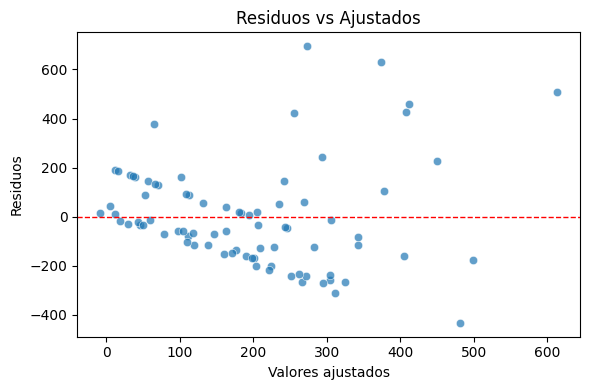

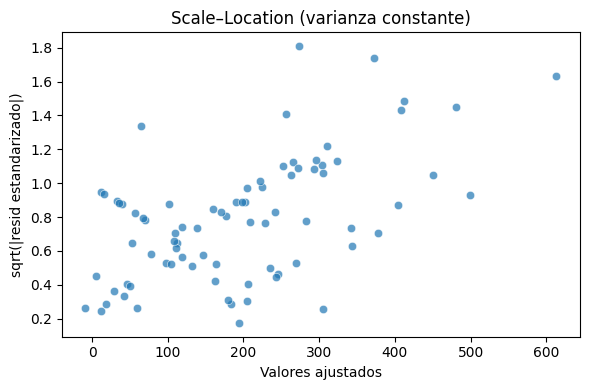

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Residuos y regresores del mejor modelo
resid = best_model.resid
exog = best_model.model.exog
fitted = best_model.fittedvalues

# 1) Breusch–Pagan
bp_stat, bp_pvalue, bp_fstat, bp_f_pvalue = het_breuschpagan(resid, exog)
print("Breusch–Pagan:")
print(f"  LM statistic: {bp_stat:.4f} | LM p-value: {bp_pvalue:.4f}")
print(f"  F statistic:  {bp_fstat:.4f} | F p-value:  {bp_f_pvalue:.4f}")

# 2) White
w_stat, w_pvalue, w_fstat, w_f_pvalue = het_white(resid, exog)
print("White:")
print(f"  LM statistic: {w_stat:.4f} | LM p-value: {w_pvalue:.4f}")
print(f"  F statistic:  {w_fstat:.4f} | F p-value:  {w_f_pvalue:.4f}")

# Interpretación rápida:
# p-value > 0.05 sugiere no rechazar homocedasticidad (no evidencia de heterocedasticidad)

# 3) Gráfico residuos vs ajustados
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Ajustados')
plt.tight_layout()
plt.show()

# 4) Scale–Location (raíz de residuo estandarizado vs ajustados)
influence = best_model.get_influence()
resid_student = influence.resid_studentized_internal  # residuos estandarizados
scale_loc = np.sqrt(np.abs(resid_student))

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=scale_loc, alpha=0.7)
plt.xlabel('Valores ajustados')
plt.ylabel('sqrt(|resid estandarizado|)')
plt.title('Scale–Location (varianza constante)')
plt.tight_layout()
plt.show()